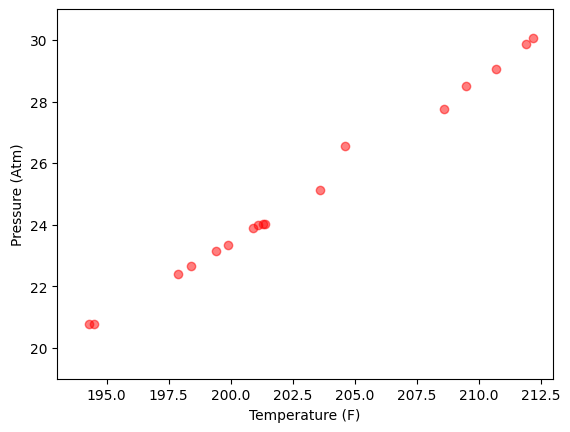

In [9]:
# Imports
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3, 203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T

# Press (Atm)
y = np.array([[20.79,20.79,22.4,22.67,23.15,23.35,23.89,23.99,24.02,24.01,25.14,26.57,28.49,27.76,29.04,29.88,30.06]]).T

# Visualize data
plt.plot(X, y, 'ro', alpha = 0.5)
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [10]:
k = 4
n_train = 16

def distance(array, value):
    array = np.array(array)
    return abs(array - value)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D, axis=0)[:k].flatten() 

data_len = len(X)

X_train = np.array(X[:n_train])
Y_train = np.array(y[:n_train])

X_test = np.array(X[n_train:data_len])
Y_test = np.array(y[n_train:data_len])

In [11]:
Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indices = find_nearest_index(X_train, X_test[i], k)
    Y_pred[i] = np.mean(Y_train[indices])
    print(f"{Y_pred[i]} | {Y_test[i]}")

28.7925 | [30.06]



Performance Metrics:
Mean Squared Error (MSE): 1.6066
Mean Absolute Error (MAE): 1.2675


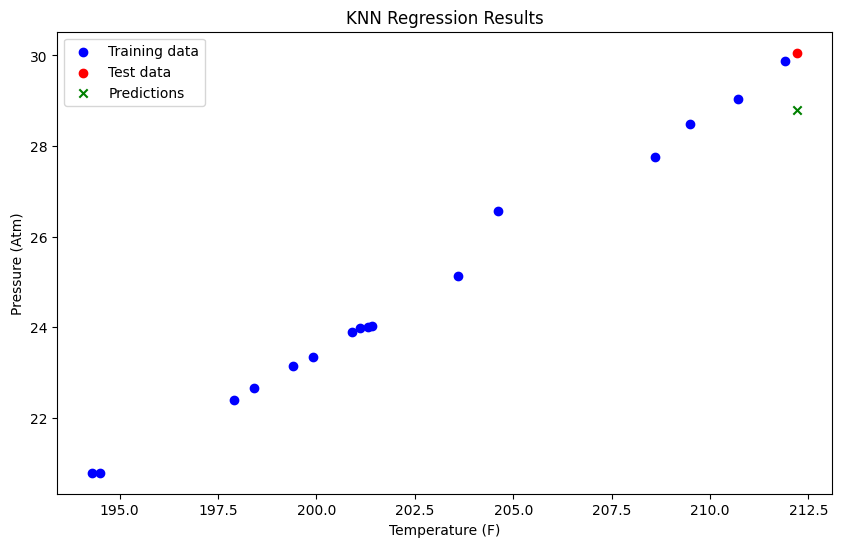

In [12]:
# Calculate performance metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
# r2 = r2_score(Y_test, Y_pred)

print("\nPerformance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"R-squared (R²): {r2:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))

# Plot training data points
plt.scatter(X_train, Y_train, color='blue', label='Training data')

# Plot test data points
plt.scatter(X_test, Y_test, color='red', label='Test data')

# Plot predicted data points (instead of a line)
plt.scatter(X_test, Y_pred, color='green', label='Predictions', marker='x')

plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.legend()
plt.title('KNN Regression Results')
plt.show()